# Data Preparation

1. Checking 2018 file - Not possible for the moment
2. Checking 2013 file - done / variables in three countries are ok, just for the p file 
3. Indicator preparation 
4. Checking the rest of the files

In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [288]:
# Función para generar strings con nombres de los ficheros cambiando el identificador del año 
# Definición de los campos: 
# pr: prefix - IE: './files/' - string
# sb: subfix: IE: '_2013p_EUSILC.csv' - string
# cr: country IE: ['LT'...] - list
def filelist(st1,st2,cr): 
    filelist = []
    for s in cr:
        filename = st1 + s + st2
        filelist.append(filename)
    return filelist

# Función para concatenar los ficheros de los distintos años en un sólo fichero - adaptar y revisar
def concatenated_df(df_list, var_list):
    df_temp = pd.DataFrame()
    for file in df_list:
        df = pd.read_csv(file , usecols = var_list, low_memory = False)
        if df_temp.shape == (0,0):
            df_temp = df
        else: 
            df_temp = pd.concat([df_temp,df])
    return df_temp

# Función para convertir a float las variable de renta y y otras que deberían ser numéricas
def to_numeric(x):
    if type(x) is str:
        x = x.lstrip()
        if not x:
            return np.NaN
        else:
            return float(x)
    else: 
        return x

In [236]:
df_temp.head()

,PB010,PB020,PB030,PB040,PB060,PB100,PB110,PB120,PB130,PB140,PB150,PB190,PB200,PB220A,PE010,PE020,PE040,PL031,PL035,PL015,PL020,PL025,PL040,PL051,PL060,PL100,PL111,PL120,PL130,PL140,PL150,PL160,PL170,PL180,PL190,PH010,PH020,PH030,PH040,PH050,PH060,PH070,PY020N,PY035N,PY010G,PY020G,PY021G,PY030G,PY031G,PY035G,PY050G,PY080G,PY090G,PY100G,PY110G,PY120G,PY130G,PY140G,PY200G,PD020,PD030,PD050,PD060,PD070,PD080,PD090,PW010,PW020,PW030,PW040,PW050,PW060,PW070,PW080,PW090,PW100,PW110,PW120,PW130,PW140,PW150,PW160,PW170,PW180,PW190,PW200,PW210,PW220,PX010,PX020,PX030,PX040,PX050,PX200
0,2013,LT,71.0,253.664,NaN,2.0,2013.0,10.0,3.0,1932,1,4.0,3,LT,2.0,NaN,1.0,7.0,NaN,NaN,NaN,NaN,3.0,6,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0,1.0,1.0,2.0,NaN,2.0,NaN,1.0,1.0,0,0,0.0,0.0,1.0,0,0,0,0,3788,228,0,0,0,1.0,2.0,1.0,1.0,3.0,1.0,3.0,5.0,6.0,7.0,7.0,7.0,5.0,4.0,3.0,NaN,3.0,NaN,6.0,3.0,6.0,6.0,8.0,7.0,1.0,2.0,8.0,8.0,8.0,3.0,3.4528,80.0,7.0,1.0,NaN,234.81080
1,2013,LT,541.0,253.664,NaN,2.0,2013.0,22.0,1.0,1942,1,2.0,1,LT,2.0,NaN,3.0,3.0,NaN,NaN,NaN,NaN,3.0,7,40.0,NaN,b-e,NaN,13.0,1.0,2.0,NaN,NaN,NaN,NaN,3.0,2.0,3.0,2.0,2.0,2.0,NaN,1.0,1.0,0,0,0.0,6739.0,1.0,182,6705,0,0,0,0,0,0,0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,5.0,8.0,7.0,9.0,2.0,4.0,2.0,NaN,NaN,NaN,8.0,8.0,3.0,6.0,7.0,9.0,1.0,1.0,2.0,NaN,5.0,3.0,3.4528,70.0,54.0,1.0,2.0,248.60831
2,2013,LT,581.0,253.664,NaN,2.0,2013.0,25.0,2.0,1936,1,2.0,1,LT,2.0,NaN,2.0,7.0,NaN,NaN,NaN,NaN,3.0,8,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN,NaN,NaN,NaN,1.0,2.0,2.0,2.0,NaN,2.0,NaN,1.0,1.0,0,0,0.0,0.0,1.0,0,0,0,0,2463,949,0,0,0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,7.0,6.0,NaN,NaN,4.0,5.0,2.0,4.0,4.0,5.0,NaN,NaN,5.0,6.0,NaN,9.0,1.0,1.0,5.0,NaN,3.0,3.0,3.4528,76.0,58.0,1.0,2.0,307.37400
3,2013,LT,881.0,253.664,NaN,2.0,2013.0,15.0,1.0,1938,2,4.0,3,LT,2.0,NaN,4.0,7.0,NaN,1.0,NaN,NaN,3.0,5,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,2.0,NaN,2.0,NaN,1.0,1.0,0,0,0.0,514.0,1.0,203,0,0,0,7373,0,0,0,0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,5.0,NaN,NaN,7.0,NaN,5.0,1.0,3.0,NaN,8.0,10.0,9.0,0.0,NaN,10.0,8.0,1.0,1.0,NaN,NaN,10.0,NaN,3.4528,74.0,88.0,1.0,2.0,182.22831
4,2013,LT,1041.0,253.664,NaN,2.0,2013.0,25.0,2.0,1932,2,2.0,1,LT,2.0,NaN,1.0,7.0,NaN,1.0,2.0,NaN,3.0,9,40.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,3.0,2.0,NaN,2.0,NaN,1.0,1.0,0,0,0.0,0.0,1.0,0,0,0,0,2461,0,0,0,0,1.0,2.0,1.0,2.0,1.0,2.0,3.0,1.0,4.0,10.0,8.0,1.0,3.0,4.0,NaN,4.0,4.0,NaN,NaN,5.0,1.0,6.0,3.0,5.0,1.0,1.0,1.0,7.0,5.0,9.0,3.4528,80.0,104.0,1.0,2.0,1163.12592


In [290]:
%%time
# Application to open dfs

cr_list = ['LT','FR','ES','DE','BG'] # List with the prefix of the dfs
d_filelist = filelist('./files/','_2013p_EUSILC.csv',cr_list) # udf application to obtain the list of names
myvar_list = ['PB010','PB020','PB030','PB040','PB060','PB100','PB110','PB120','PB130', # list of usecols to be used
 'PB140','PB150','PB190','PB200','PB220A','PE010','PE020','PE040','PL031',
 'PL035','PL015','PL020','PL025','PL040','PL051','PL060','PL100', 'PL111',
 'PL120','PL130','PL140','PL150','PL160','PL170','PL180','PL190', 'PH010',
 'PH020','PH030','PH040','PH050','PH060','PH070','PY020N','PY035N',
 'PY010G','PY020G','PY021G','PY030G','PY031G','PY035G','PY050G','PY080G',
 'PY090G','PY100G','PY110G','PY120G','PY130G','PY140G','PY200G','PD020',
 'PD030','PD050','PD060','PD070','PD080','PD090','PW010','PW020','PW030',
 'PW040','PW050','PW060','PW070','PW080','PW090','PW100','PW110','PW120',
 'PW130','PW140','PW150','PW160','PW170','PW180','PW190','PW200','PW210',
 'PW220','PX010','PX020','PX030','PX040','PX050','PX200']
df_temp = concatenated_df(d_filelist, myvar_list) # udf to open files and concatenate then into a df

var_selection = ['PB020','PB010', 'PB030','PB150','PB140','PB190','PL031','PE040','PH010','PH020','PH030', 
               'PD020','PD030','PD050','PD060','PD070','PD080', 'PW050','PW060','PW070','PW080','PW090',
               'PW010','PW030','PW120','PW160']

df_temp = df_temp[var_selection]

df_temp.rename(columns = {'PB020':'Country','PB010':'Year','PB030':'IndID','PB150':'Sex','PB140':'YBirht','PB190':'MarStatus',
                       'PL031': 'WorStatus', 'PE040':'FStudies','PH010':'CHealth',
                       'PH020':'CrConditions','PH030':'HLimitations', 'PD020':'MDClothes','PD030':'MDShoes', 'PD050':'MDFriends',
                       'PD060':'MDLeisure', 'PD070':'MDSelf','PD080':'MDInternet',                  
                       'PW050':'FFTense','PW060':'FFDown','PW070':'FFCalm','PW080':'FFDepressed','PW090':'FFHappy',
                       'PW010':'WSOovsat','PW030':'WBSrelations','PW120':'WBSowntime','PW160':'WSBeconomy'}, 
                        inplace = True)

# Household Id
# El identificador del individuo lleva asociado el código del hogar. El identificador del individuo son los dos últimos dígitos
# de el Id del individuo y el resto es el Id de su hogar
df_temp['HHId'] = df_temp['IndID'].apply(lambda x: str(x)[:-2]).astype(int)

# Generamos un código único por individuo y año y repetimos la operación por hogar, aunque en el caso del hogar los IDs estarán
# repetidos para las personas que conformen la misma unidad
df_temp['Year_HHid'] = df_temp['Year'].astype(str) + '_'+ df_temp['HHId'].astype(str)
df_temp['Year_IndID'] = df_temp['Year'].astype(str) + '_'+ df_temp['IndID'].astype(str)

# Conversión variable género
df_temp['Sex'] = df_temp['Sex'].apply(lambda x: 'Hombre' if x == 1 else 'Mujer')

# Conversión año de nacimiento en edad
df_temp['AgeNumeric'] = df_temp['Year'] - df_temp['YBirht']

# Convertimos la variable de condiciones de salud en numérica, que si bien es categórica es ordinal 
df_temp['CHealth'] = df_temp['CHealth'].apply(to_numeric)

CPU times: user 1.11 s, sys: 438 ms, total: 1.55 s
Wall time: 1.54 s


<BarContainer object of 5 artists>

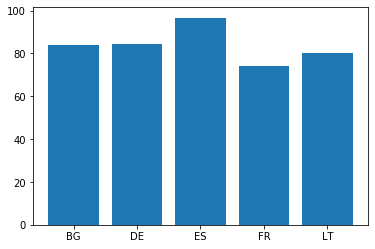

In [283]:
# Declarate satisfaction with lifestyle rates are quite different
swl = pd.DataFrame(df_temp.groupby(['Country'])['WSOovsat'].count() / df_temp.groupby(['Country'])['IndID'].count() * 100).reset_index()
plt.bar(x = swl['Country'], height = swl[0])

In [284]:
df_temp.isna().sum()

Country             0
Year                0
IndID               0
Sex                 0
YBirht              0
MarStatus        1303
WorStatus        1097
FStudies         3209
CHealth          2031
CrConditions      304
HLimitations      436
MDClothes         590
MDShoes           604
MDFriends         592
MDLeisure         565
MDSelf            642
MDInternet        629
FFTense         13331
FFDown          13339
FFCalm          13391
FFDepressed     13235
FFHappy         13405
WSOovsat        13318
WBSrelations    13336
WBSowntime      13367
WSBeconomy      13436
HHId                0
dtype: int64

In [294]:
# In Germany code 8 - don´t know applies, not in the other countries
df_temp[df_temp['CrConditions'] == 8].tail(100)

,Country,Year,IndID,Sex,YBirht,MarStatus,WorStatus,FStudies,CHealth,CrConditions,HLimitations,MDClothes,MDShoes,MDFriends,MDLeisure,MDSelf,MDInternet,FFTense,FFDown,FFCalm,FFDepressed,FFHappy,WSOovsat,WBSrelations,WBSowntime,WSBeconomy,HHId,Year_HHid,Year_IndID,AgeNumeric
19658,DE,2013,357914203.0,Hombre,1989,1.0,6.0,3.0,1.0,8.0,3.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,3.0,NaN,2.0,8.0,NaN,7.0,10.0,357914203,2013_357914203,2013_357914203.0,24
19726,DE,2013,358710603.0,Hombre,1986,1.0,1.0,5.0,2.0,8.0,3.0,3.0,2.0,NaN,3.0,1.0,1.0,1.0,5.0,2.0,4.0,2.0,9.0,7.0,10.0,99.0,358710603,2013_358710603,2013_358710603.0,27
19742,DE,2013,358858001.0,Hombre,1965,2.0,1.0,3.0,2.0,8.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,NaN,2.0,4.0,2.0,8.0,6.0,5.0,0.0,358858001,2013_358858001,2013_358858001.0,48
19744,DE,2013,358858003.0,Mujer,1988,1.0,6.0,3.0,2.0,8.0,2.0,1.0,1.0,1.0,3.0,2.0,2.0,4.0,5.0,2.0,2.0,4.0,NaN,5.0,10.0,8.0,358858003,2013_358858003,2013_358858003.0,25
19755,DE,2013,358936501.0,Hombre,1965,2.0,1.0,5.0,3.0,8.0,2.0,3.0,1.0,1.0,1.0,1.0,3.0,3.0,NaN,2.0,3.0,2.0,10.0,1.0,6.0,4.0,358936501,2013_358936501,2013_358936501.0,48
19790,DE,2013,359801401.0,Mujer,1968,2.0,10.0,5.0,3.0,8.0,3.0,2.0,1.0,2.0,2.0,1.0,1.0,4.0,3.0,4.0,4.0,3.0,8.0,8.0,8.0,7.0,359801401,2013_359801401,2013_359801401.0,45
19796,DE,2013,359926701.0,Mujer,1963,5.0,1.0,5.0,2.0,8.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,4.0,2.0,3.0,2.0,10.0,8.0,2.0,9.0,359926701,2013_359926701,2013_359926701.0,50
19804,DE,2013,360176601.0,Mujer,1987,1.0,6.0,3.0,3.0,8.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,2.0,8.0,NaN,NaN,9.0,360176601,2013_360176601,2013_360176601.0,26
19827,DE,2013,360691901.0,Mujer,1966,5.0,2.0,5.0,2.0,8.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,4.0,2.0,4.0,2.0,NaN,1.0,3.0,NaN,360691901,2013_360691901,2013_360691901.0,47
19886,DE,2013,362372001.0,Hombre,1954,1.0,8.0,3.0,2.0,8.0,3.0,1.0,1.0,3.0,3.0,1.0,3.0,5.0,NaN,2.0,3.0,2.0,5.0,5.0,8.0,NaN,362372001,2013_362372001,2013_362372001.0,59


In [ ]:
# Conversión variable género
df_P1['CrConditions'] = df_P1['CrConditions'].apply(lambda x: 'NChronic' if x == '2'\
                                                              else 'YChronic' if x == '1' else 'Unknown / Not Declared')

# Conversión variable género
df_P1['HLimitations'] = df_P1['HLimitations'].apply(lambda x: 'SerLimited' if x == '1'\
                                                              else 'NoSerLimitedG_limitado' if x == '2' \
                                                              else 'NoLimited' if x == '3' else 'Unknown / Not declared')

df_P1['CHealth_D'] = df_P1['CHealth'].apply(healthcondition)


# Lista de variables de felicidad  
list_happines = ['FFTense','FFDown','FFCalm','FFDepressed','FFHappy','WSOovsat','WBSrelations','WBSowntime','WSBeconomy']
    
df_P1[list_happines] = df_P1[list_happines].applymap(lambda s: to_numeric(s)) 


# Marital status
def civilstate(x):
    if x == '1': 
        return 'Soltero'
    elif x == '2':
        return 'Casado'
    elif x == '3': 
        return 'Separado'
    elif x == '4': 
        return 'Viudo'
    elif x == '5':
        return 'Divorciado'
    else:
        return 'Uknown / Prefer not to say'

# Conversión variable estado civil
df_P1['MarStatus'] = df_P1['MarStatus'].apply(civilstate)    
    
# Studies
def studiesF(x):
    if x == '000': 
        return '<Primaria'
    elif x == '100':
        return 'Primaria'
    elif x == '200': 
        return 'Secundaria1'
    elif x == '300': 
        return 'Secundaria2'
    elif x == '344':
        return 'OrGeneral'
    elif x == '353' or x == '354':
        return 'OrProfesional'
    elif x == '400':
        return 'SecundariaNoOb'
    elif x == '450':
        return 'OrProfesional'
    elif x == '500':
        return 'EdSuperior'
    else:
        return 'Uknown'
    
# Conversión variable estudios
df_P1['FStudies'] = df_P1['FStudies'].apply(studiesF)    
    
# Workign Status
def workingStatus(x):
    if x == '1': 
        return 'EmployeeFT'
    elif x == '2':
        return 'EmployeePT'
    elif x == '3': 
        return 'SEmployedFT'
    elif x == '4': 
        return 'SEmployedPT'
    elif x == '5':
        return 'Unemployed'
    elif x == '6':
        return 'Student'
    elif x == '7':
        return 'Retired'
    elif x == '9':
        return 'NotAble'
    elif x == '10':
        return 'HHoldKeeper'
    elif x == '11':
        return 'OtherNonWorking'
    else:
        return 'Uknown / Not declared'    

# Conversión estatus del laboral
df_P1['WorStatus'] = df_P1['WorStatus'].apply(workingStatus)


# Privación material personal
def MatDepriv(x):
    if x == '1':
        return 'Yes'
    elif x == '2':
        return 'No affordable'
    elif x == '3': 
        return 'No, other reason'
    else:
        return 'Unknown / Not Declared'

    
list_pdepriv = ['MDClothes','MDShoes','MDFriends','MDLeisure','MDSelf','MDInternet']
    
df_P1[list_pdepriv] = df_P1[list_pdepriv].applymap(lambda s: MatDepriv(s)) 


df_P1.tail()

sources: https://ec.europa.eu/eurostat/web/microdata/statistics-on-income-and-living-conditions